In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Secyan

In [85]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
data_size_nums = [1, 10, 100, 1000]
query_nums = range(5)
query_order = [3,10,18,8,9]

secyan_data_dict = {}

cols = ['query_num', 'time_taken', 'data_size']

# get all data in one pd dataframe
total_data = pd.DataFrame(columns=cols)
for i, data_size in enumerate(data_sizes):
    # secyan_medians = data_dict[data_size]['secyan_medians']
    # secyan_stdevs = data_dict[data_size]['secyan_stdevs']
    path = f'../datastation-escrow/data_comparisons/secyan/secyan_data/{data_size}.csv'
    df = pd.read_csv(path, names=cols, header=None)
    
    # add a column with data_size
    df['data_size'] = data_size_nums[i]
    
    # make -1 values NaN
    df = df.replace(-1, np.nan)

    # add to total_data
    total_data = pd.concat([total_data, df])

# groupby
for query_num in query_nums:
    query_data = total_data[(total_data['query_num'] == query_num)]

    secyan_medians = query_data.groupby('data_size')['time_taken'].median()
    secyan_stdevs = query_data.groupby('data_size')['time_taken'].std()
    
    secyan_data_dict[query_order[query_num]] = {'secyan_medians': secyan_medians, 'secyan_stdevs': secyan_stdevs}
print(secyan_data_dict)


{3: {'secyan_medians': data_size
1         0.142
10        1.102
100      11.013
1000    128.675
Name: time_taken, dtype: float64, 'secyan_stdevs': data_size
1       0.003055
10      0.033724
100     0.289614
1000    1.949647
Name: time_taken, dtype: float64}, 10: {'secyan_medians': data_size
1         0.144
10        1.084
100      10.716
1000    125.215
Name: time_taken, dtype: float64, 'secyan_stdevs': data_size
1       0.002517
10      0.009292
100     0.212919
1000    0.825508
Name: time_taken, dtype: float64}, 18: {'secyan_medians': data_size
1         0.275
10        2.146
100      20.437
1000    224.919
Name: time_taken, dtype: float64, 'secyan_stdevs': data_size
1       0.010263
10      0.033307
100     0.102137
1000    1.778212
Name: time_taken, dtype: float64}, 8: {'secyan_medians': data_size
1        0.862
10       6.836
100     71.433
1000       NaN
Name: time_taken, dtype: float64, 'secyan_stdevs': data_size
1       0.009609
10      0.064583
100     0.222855
1000         

# Data Station

In [86]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
data_size_nums = [1, 10, 100, 1000]
query_nums = [3,10,18,8,9]
ds_data_dict = {}

cols = ['query_num', 'time_taken', 'dec_time', 'data_size']

# get all data in one pd dataframe
total_data = pd.DataFrame(columns=cols)
for i, data_size in enumerate(data_sizes):
    # secyan_medians = data_dict[data_size]['secyan_medians']
    # secyan_stdevs = data_dict[data_size]['secyan_stdevs']
    if data_size == '1MB':
        path = f'../datastation-escrow/data_comparisons/secyan/ds_data/{data_size}_2.csv'
    else:
        path = f'../datastation-escrow/data_comparisons/baseline/ds_data/{data_size}_2.csv'
    df = pd.read_csv(path, names=cols, header=None)
    
    # add a column with data_size
    df['data_size'] = data_size_nums[i]

    # make -1 values nan
    df = df.replace(-1, np.nan)
    
    if data_size == '1MB':
        # change query nums from 1...5 to 3,10,18,8,9
        df['query_num'] = df['query_num'].map({1:3, 2:10, 3:18, 4:8, 5:9})
    
    # add to total_data
    total_data = pd.concat([total_data, df])

# print(total_data)
# groupby
for query_num in query_nums:
    query_data = total_data[(total_data['query_num'] == query_num)]

    ds_medians = query_data.groupby('data_size')['time_taken'].median()
    ds_stdevs = query_data.groupby('data_size')['time_taken'].std()
    
    ds_data_dict[query_num] = {'ds_medians': ds_medians, 'ds_stdevs': ds_stdevs}
    
print(ds_data_dict)

{3: {'ds_medians': data_size
1        1.686737
10       1.833328
100      3.419430
1000    19.017711
Name: time_taken, dtype: float64, 'ds_stdevs': data_size
1       0.010307
10      0.015920
100     0.018942
1000    0.029519
Name: time_taken, dtype: float64}, 10: {'ds_medians': data_size
1        1.675160
10       1.843133
100      3.424211
1000    19.131534
Name: time_taken, dtype: float64, 'ds_stdevs': data_size
1       0.013255
10      0.012362
100     0.005296
1000    0.066212
Name: time_taken, dtype: float64}, 18: {'ds_medians': data_size
1        1.666968
10       1.851890
100      3.439401
1000    19.305278
Name: time_taken, dtype: float64, 'ds_stdevs': data_size
1       0.003096
10      0.014962
100     0.019313
1000    0.112374
Name: time_taken, dtype: float64}, 8: {'ds_medians': data_size
1        1.681176
10       1.868598
100      3.478058
1000    19.479981
Name: time_taken, dtype: float64, 'ds_stdevs': data_size
1       0.007243
10      0.004205
100     0.012989
1000    0

# DuckDB

In [87]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
data_size_nums = [1, 10, 100, 1000]
query_nums = [3,10,18,8,9]

duckdb_data_dict = {}

cols = ['query_num', 'time_taken', 'data_size']

total_data = pd.DataFrame(columns=cols)
for i, data_size in enumerate(data_sizes):
    path = f'../datastation-escrow/data_comparisons/baseline/baseline_data/{data_size}_2.csv'
    df = pd.read_csv(path, names=cols, header=None)
    
    # add a column with data_size
    df['data_size'] = data_size_nums[i]
    
    # make -1 values nan   
    df = df.replace(-1, np.nan)
        
    # add to total_data
    total_data = pd.concat([total_data, df])

# groupby
for query_num in query_nums:
    query_data = total_data[(total_data['query_num'] == query_num)]

    baseline_medians = query_data.groupby('data_size')['time_taken'].median()
    baseline_stdevs = query_data.groupby('data_size')['time_taken'].std()
    
    duckdb_data_dict[query_num] = {'baseline_medians': baseline_medians, 'baseline_stdevs': baseline_stdevs}

print(duckdb_data_dict)

{3: {'baseline_medians': data_size
1        0.143562
10       0.404949
100      1.308272
1000    10.148737
Name: time_taken, dtype: float64, 'baseline_stdevs': data_size
1       0.003451
10      0.001011
100     0.001416
1000    0.012662
Name: time_taken, dtype: float64}, 10: {'baseline_medians': data_size
1        0.144115
10       0.406701
100      1.317189
1000    10.236524
Name: time_taken, dtype: float64, 'baseline_stdevs': data_size
1       0.002402
10      0.000309
100     0.011972
1000    0.033491
Name: time_taken, dtype: float64}, 18: {'baseline_medians': data_size
1        0.108258
10       0.338319
100      1.289034
1000    10.381899
Name: time_taken, dtype: float64, 'baseline_stdevs': data_size
1       0.000227
10      0.002862
100     0.008431
1000    0.055180
Name: time_taken, dtype: float64}, 8: {'baseline_medians': data_size
1        0.152347
10       0.430780
100      1.358561
1000    10.362320
Name: time_taken, dtype: float64, 'baseline_stdevs': data_size
1       0.00

# Plots

### Query 3

[nan, nan, nan, nan]


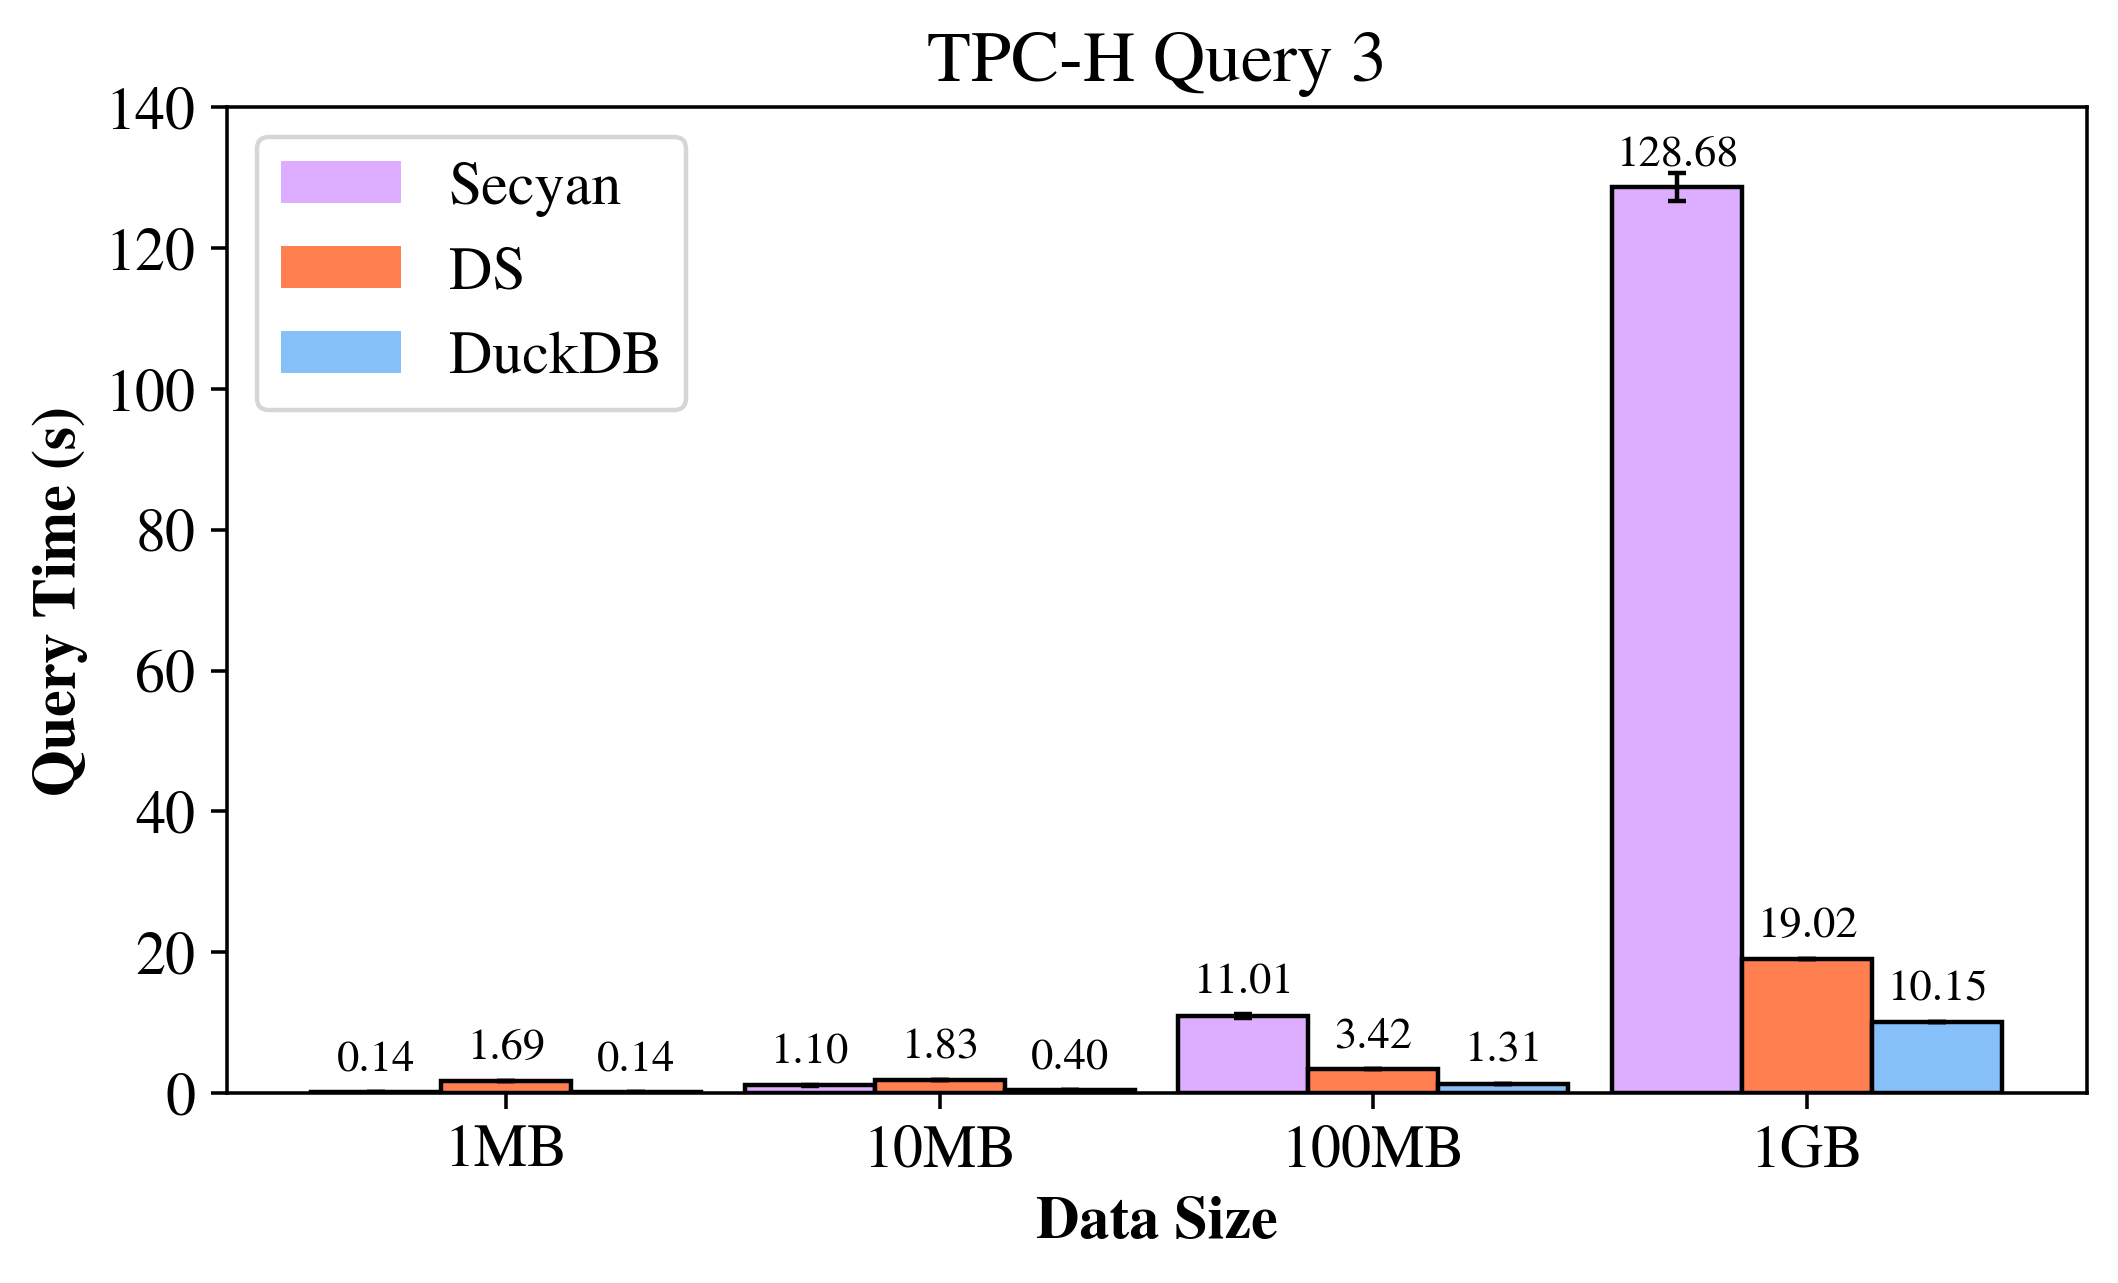

In [88]:
secyan_medians = secyan_data_dict[3]['secyan_medians']
secyan_stdevs = secyan_data_dict[3]['secyan_stdevs']
ds_medians = ds_data_dict[3]['ds_medians']
ds_stdevs = ds_data_dict[3]['ds_stdevs']
duckdb_medians = duckdb_data_dict[3]['baseline_medians']
duckdb_stdevs = duckdb_data_dict[3]['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(4) + 1

width = 0.3

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 140

f = plt.figure(figsize=(7.5, 4), dpi=320)
# plt.yscale('log')

# secyan
secyan_bar = plt.bar(x=X_axis-width,width=width,height=secyan_medians,label="Secyan",
        color='#ddaeff'
        )
plt.bar(x=X_axis-width,width=width,height=secyan_medians,yerr=secyan_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else min_y for row in secyan_medians]
print(left_x)
plt.scatter(X_axis-width, left_x, [200]*4,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=4,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-width,left_x, [165]*4,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=4,
            clip_on=False,
            linewidths=1,
            )
# print(conclave_medians[:2])
secyan_label = map(lambda n: '{0:.2f}'.format(n),secyan_medians)
plt.bar_label(secyan_bar, secyan_label, fontsize=bar_label_font_size,
        #       rotation=90, 
              padding=padding
              )


# ds
ds_bar = plt.bar(x=X_axis,width=width,height=ds_medians,label="DS",
        color='coral'
        )
plt.bar(x=X_axis,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
              )

# duckdb
duckdb_bar = plt.bar(x=X_axis+width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
plt.bar(x=X_axis+width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
        #       rotation=90,
              padding=padding
              )

axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend(ncol=1, loc='upper left')
plt.title("TPC-H Query 3")

plt.xticks(X_axis, ['1MB', '10MB', '100MB', '1GB'])

plt.savefig("tpch_q3.pdf", bbox_inches='tight')

plt.show()




### Query 8

[nan, nan, nan, 0.0]


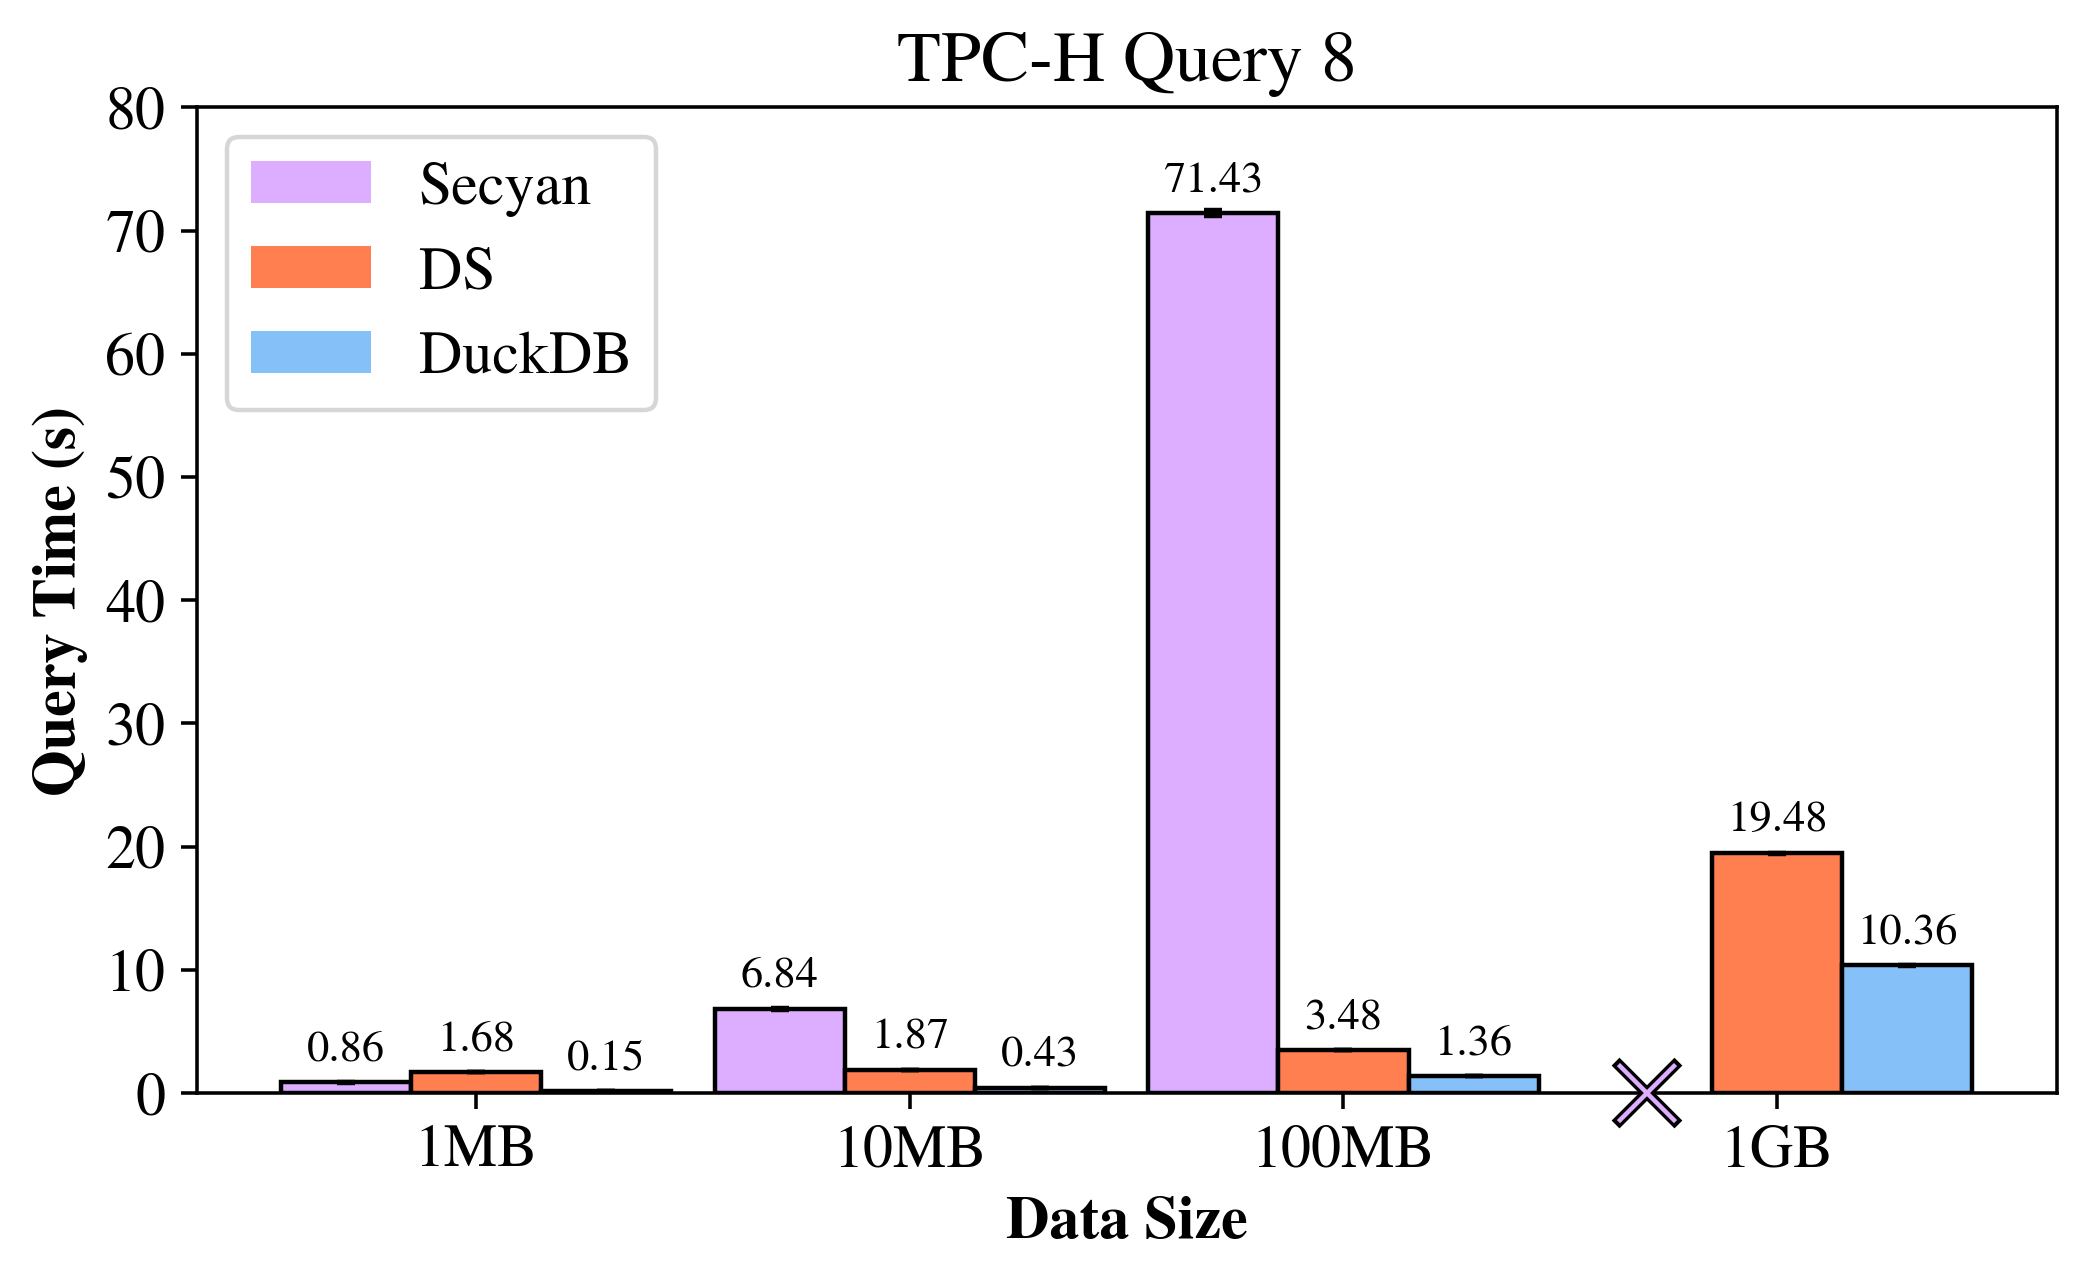

In [89]:
secyan_medians = secyan_data_dict[8]['secyan_medians']
secyan_stdevs = secyan_data_dict[8]['secyan_stdevs']
ds_medians = ds_data_dict[8]['ds_medians']
ds_stdevs = ds_data_dict[8]['ds_stdevs']
duckdb_medians = duckdb_data_dict[8]['baseline_medians']
duckdb_stdevs = duckdb_data_dict[8]['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(4) + 1

width = 0.3

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 80

plt.figure(figsize=(7.5, 4), dpi=320)
# plt.yscale('log')

# secyan
secyan_bar = plt.bar(x=X_axis-width,width=width,height=secyan_medians,label="Secyan",
        color='#ddaeff'
        )
plt.bar(x=X_axis-width,width=width,height=secyan_medians,yerr=secyan_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else min_y for row in secyan_medians]
print(left_x)
plt.scatter(X_axis-width, left_x, [200]*4,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=4,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-width,left_x, [165]*4,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=4,
            clip_on=False,
            linewidths=1,
            )
# print(conclave_medians[:2])
secyan_label = map(lambda n: '{0:.2f}'.format(n),secyan_medians)
plt.bar_label(secyan_bar, secyan_label, fontsize=bar_label_font_size,
        #       rotation=90, 
              padding=padding
              )


# ds
ds_bar = plt.bar(x=X_axis,width=width,height=ds_medians,label="DS",
        color='coral'
        )
plt.bar(x=X_axis,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
              )

# duckdb
duckdb_bar = plt.bar(x=X_axis+width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
plt.bar(x=X_axis+width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
        #       rotation=90,
              padding=padding
              )

axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend(ncol=1, loc='upper left')
plt.title("TPC-H Query 8")

plt.xticks(X_axis, ['1MB', '10MB', '100MB', '1GB'])

plt.savefig("tpch_q8.pdf", bbox_inches='tight')

plt.show()

### Query 9

[nan, nan, nan, 0.0]


/tmp/ipykernel_3542541/2477455691.py:106: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(X_axis-width, left_x, [200]*4,
/tmp/ipykernel_3542541/2477455691.py:115: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(X_axis-width,left_x, [165]*4,


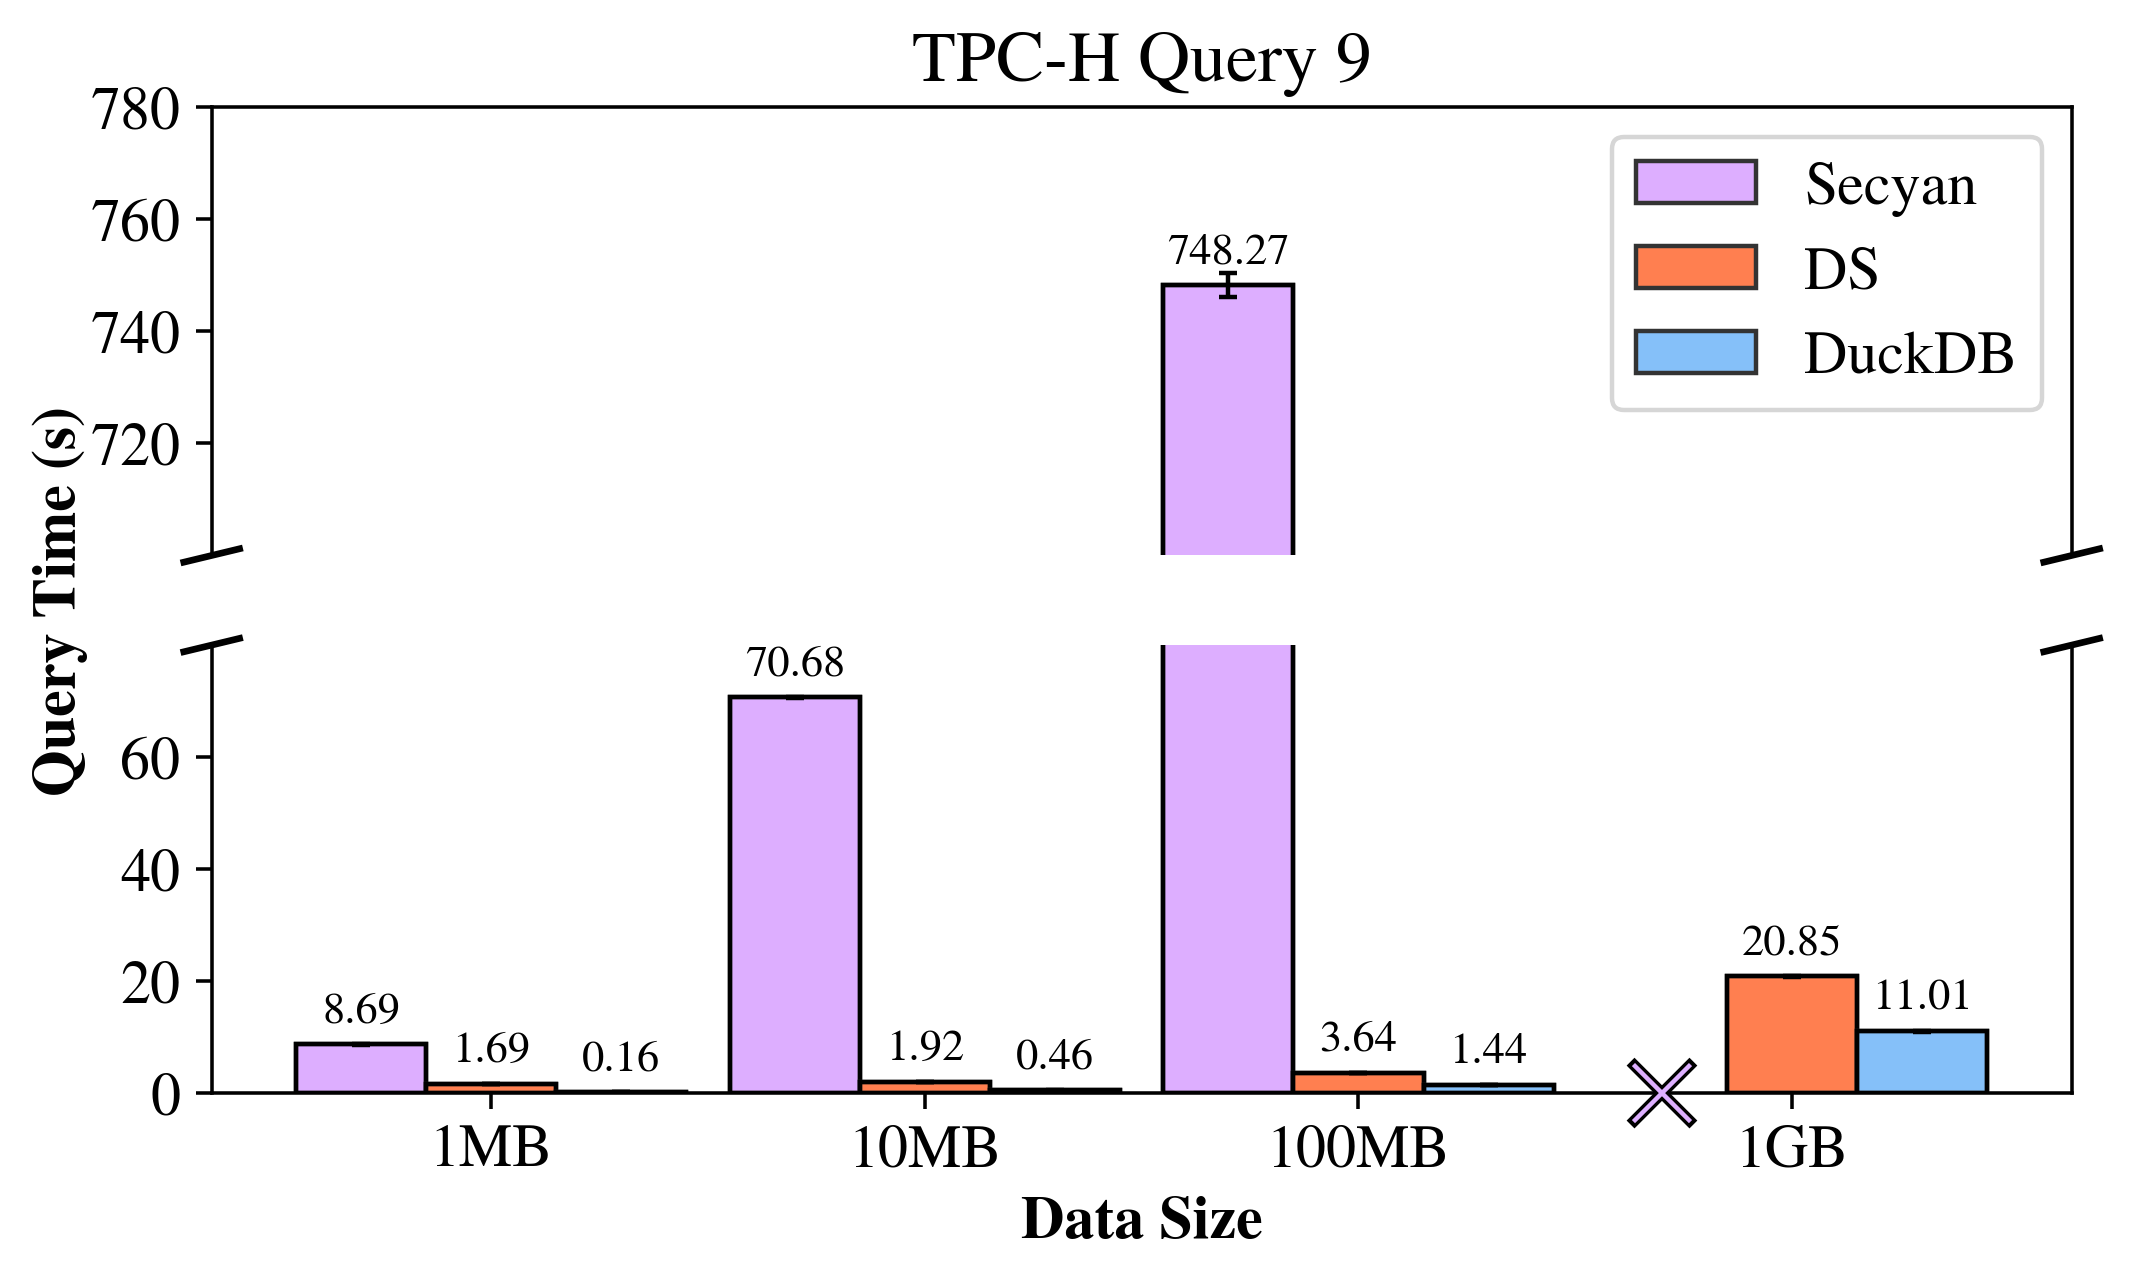

In [90]:
secyan_medians = secyan_data_dict[9]['secyan_medians']
secyan_stdevs = secyan_data_dict[9]['secyan_stdevs']
ds_medians = ds_data_dict[9]['ds_medians']
ds_stdevs = ds_data_dict[9]['ds_stdevs']
duckdb_medians = duckdb_data_dict[9]['baseline_medians']
duckdb_stdevs = duckdb_data_dict[9]['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(4) + 1

width = 0.3

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 140

left_x = [float("nan") if not np.isnan(row) else min_y for row in secyan_medians]


f = plt.figure(figsize=(7.5, 4), dpi=320)

ax = f.add_subplot(111)    # The big subplot
ax1 = f.add_subplot(211)    # The big subplot
ax2 = f.add_subplot(212)    # The big subplot
ax1_yticks = np.arange(720,800, 20)
ax2_yticks = np.arange(0,80, 20)
ax1.set_yticks(ax1_yticks)
ax2.set_yticks(ax2_yticks)

ax1.set_ylim(700, 780)
ax2.set_ylim(0, 80)

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.tick_params(top=False, bottom=False, right=False)

# plt.figure(figsize=(7.5, 4), dpi=320)
for a in [ax1, ax2]:
    # Secyan
    label = "Secyan" if a == ax1 else None
    secyan_bar = a.bar(x=X_axis-width,width=width,height=secyan_medians,label=label,
        edgecolor=[0.2,0.2,0.2],
        color='#DDAEFF'
        )
    a.bar(x=X_axis-width,width=width,height=secyan_medians,yerr=secyan_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
    secyan_label = map(lambda n: '{0:.2f}'.format(n),secyan_medians)
    a.bar_label(secyan_bar, secyan_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
                )

    # Data Station
    label = "DS" if a == ax1 else None
    ds_bar = a.bar(x=X_axis,width=width,height=ds_medians,label=label,
        edgecolor=[0.2,0.2,0.2],
        color='coral'
        )
    a.bar(x=X_axis,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
    ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
    a.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
                )
    
    # DuckDB
    label = "DuckDB" if a == ax1 else None
    duckdb_bar = a.bar(x=X_axis+width,width=width,height=duckdb_medians,label=label,
        edgecolor=[0.2,0.2,0.2],
        color='#85C0F9'
        )
    a.bar(x=X_axis+width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
          edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
    duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
    a.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
        #       rotation=90,
                padding=padding
                )


# plt.yscale("log")

print(left_x)
ax2.scatter(X_axis-width, left_x, [200]*4,
           edgecolors='black',
           marker='x',
           color = "black",
           zorder=100,
           clip_on=False,
           linewidths=2.5,
            )

ax2.scatter(X_axis-width,left_x, [165]*4,
            edgecolors='black',
            marker='x',
            color = "#DDAEFF",
            zorder=100,
            clip_on=False,
            linewidths=1,
            )

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax.set_xlabel("Data Size", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")

# plt.xlabel("Data Size", fontweight="bold")
# plt.ylabel("Query Time (s)", fontweight="bold")
ax.set_title("TPC-H Query 9")
f.legend(bbox_to_anchor=(0.9, 0.88))

ax1.set_xticks([])
ax2.set_xticks(X_axis, ['1MB', '10MB', '100MB', '1GB'])

plt.savefig("tpch_q9.pdf", bbox_inches='tight')

plt.show()

### Query 10

[nan, nan, nan, nan]


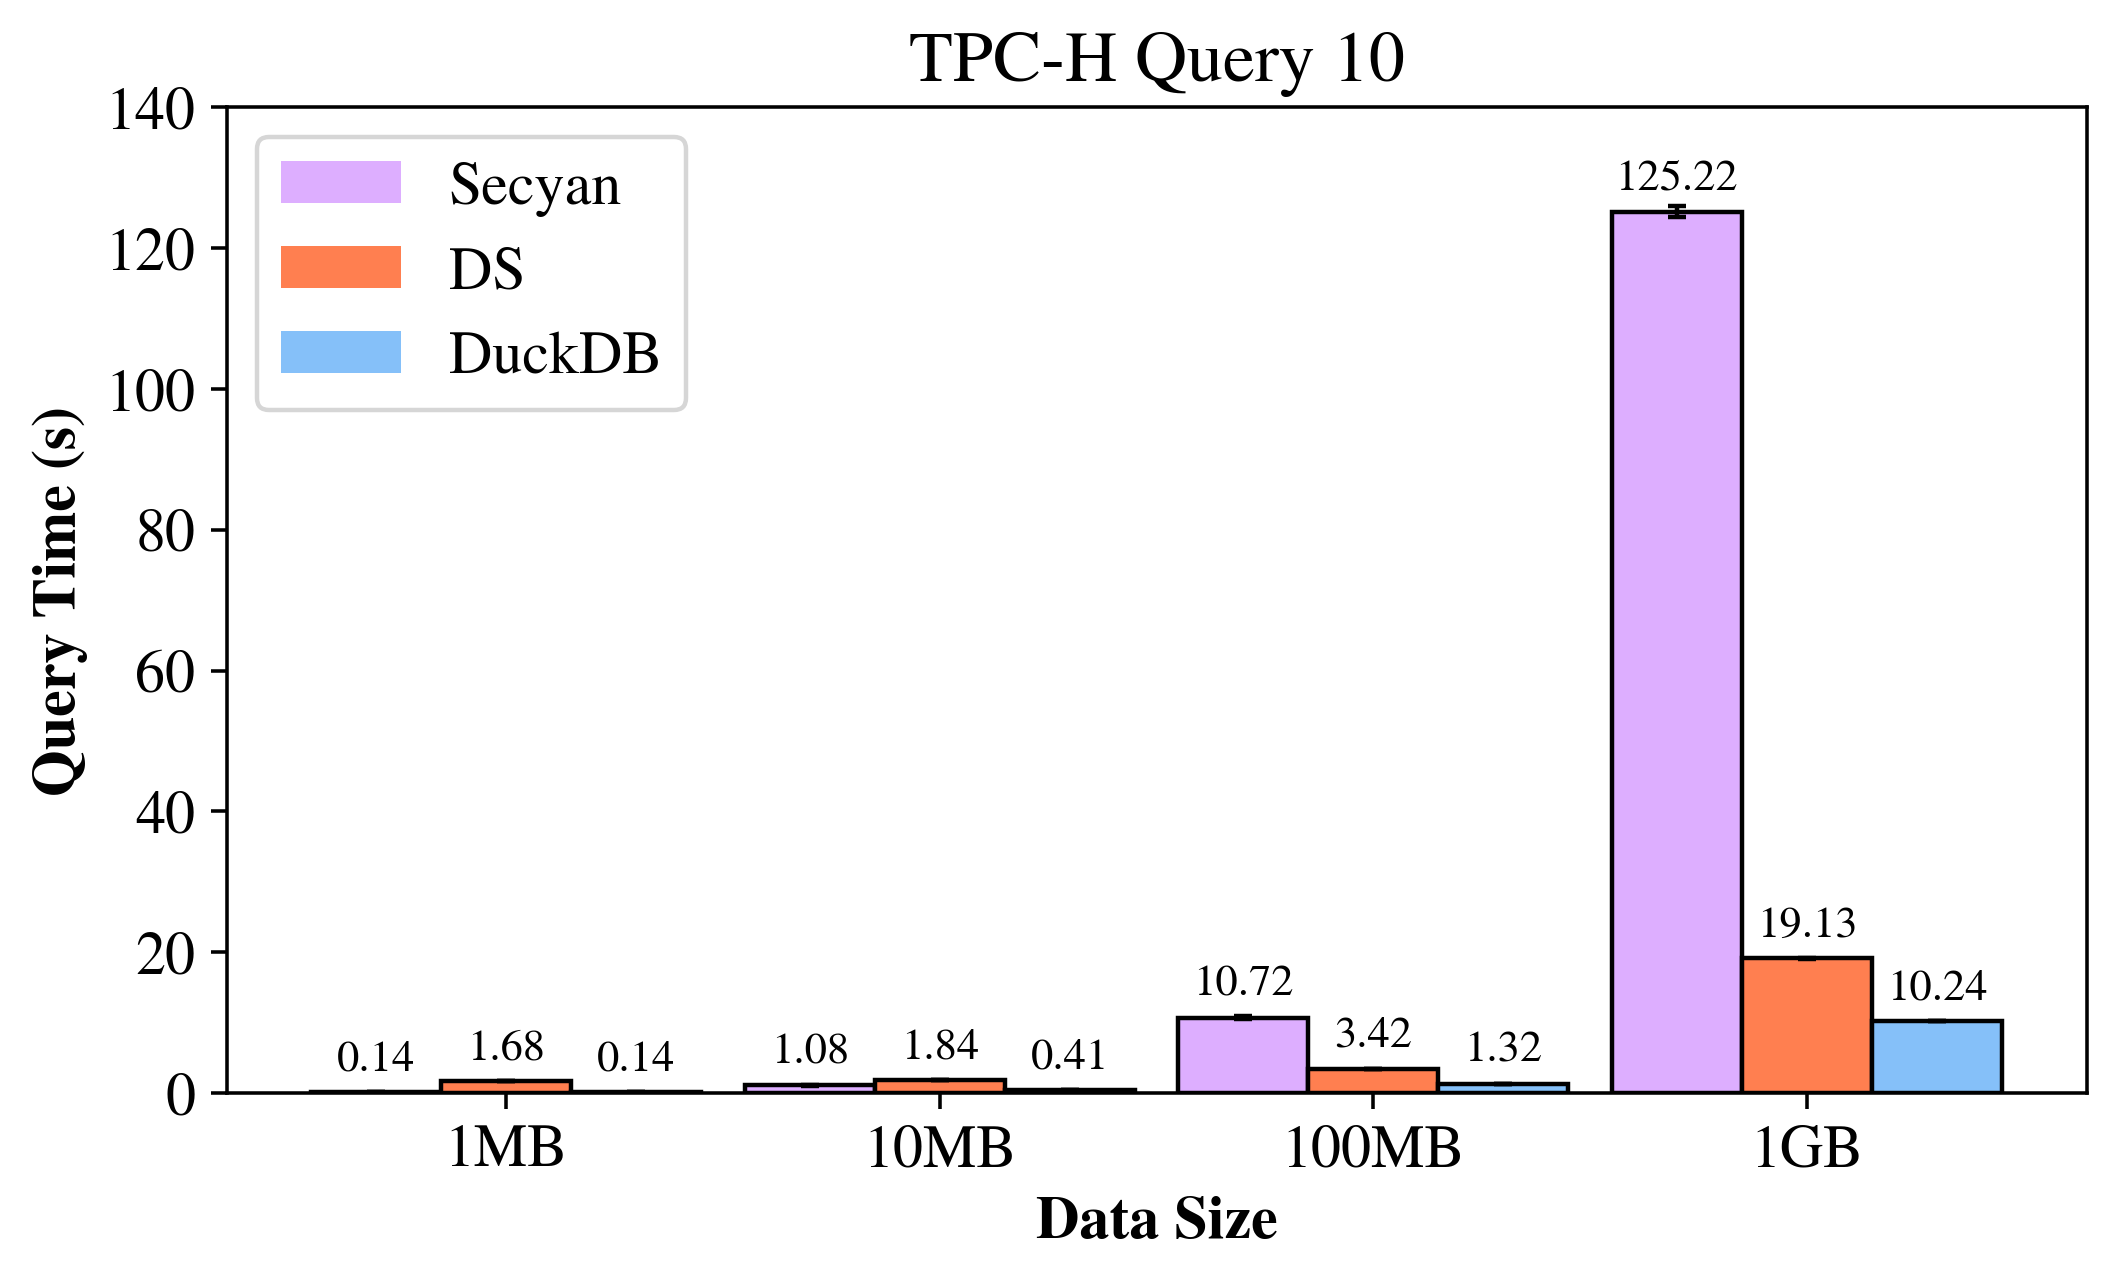

In [91]:
secyan_medians = secyan_data_dict[10]['secyan_medians']
secyan_stdevs = secyan_data_dict[10]['secyan_stdevs']
ds_medians = ds_data_dict[10]['ds_medians']
ds_stdevs = ds_data_dict[10]['ds_stdevs']
duckdb_medians = duckdb_data_dict[10]['baseline_medians']
duckdb_stdevs = duckdb_data_dict[10]['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(4) + 1

width = 0.3

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 140

plt.figure(figsize=(7.5, 4), dpi=320)
# plt.yscale('log')

# secyan
secyan_bar = plt.bar(x=X_axis-width,width=width,height=secyan_medians,label="Secyan",
        color='#ddaeff'
        )
plt.bar(x=X_axis-width,width=width,height=secyan_medians,yerr=secyan_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else min_y for row in secyan_medians]
print(left_x)
plt.scatter(X_axis-width, left_x, [200]*4,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=4,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-width,left_x, [165]*4,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=4,
            clip_on=False,
            linewidths=1,
            )
# print(conclave_medians[:2])
secyan_label = map(lambda n: '{0:.2f}'.format(n),secyan_medians)
plt.bar_label(secyan_bar, secyan_label, fontsize=bar_label_font_size,
        #       rotation=90, 
              padding=padding
              )


# ds
ds_bar = plt.bar(x=X_axis,width=width,height=ds_medians,label="DS",
        color='coral'
        )
plt.bar(x=X_axis,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
              )

# duckdb
duckdb_bar = plt.bar(x=X_axis+width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
plt.bar(x=X_axis+width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
        #       rotation=90,
              padding=padding
              )

axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend(ncol=1, loc='upper left')
plt.title("TPC-H Query 10")

plt.xticks(X_axis, ['1MB', '10MB', '100MB', '1GB'])

plt.savefig("tpch_q10.pdf", bbox_inches='tight')

plt.show()

### Query 18

[nan, nan, nan, nan]


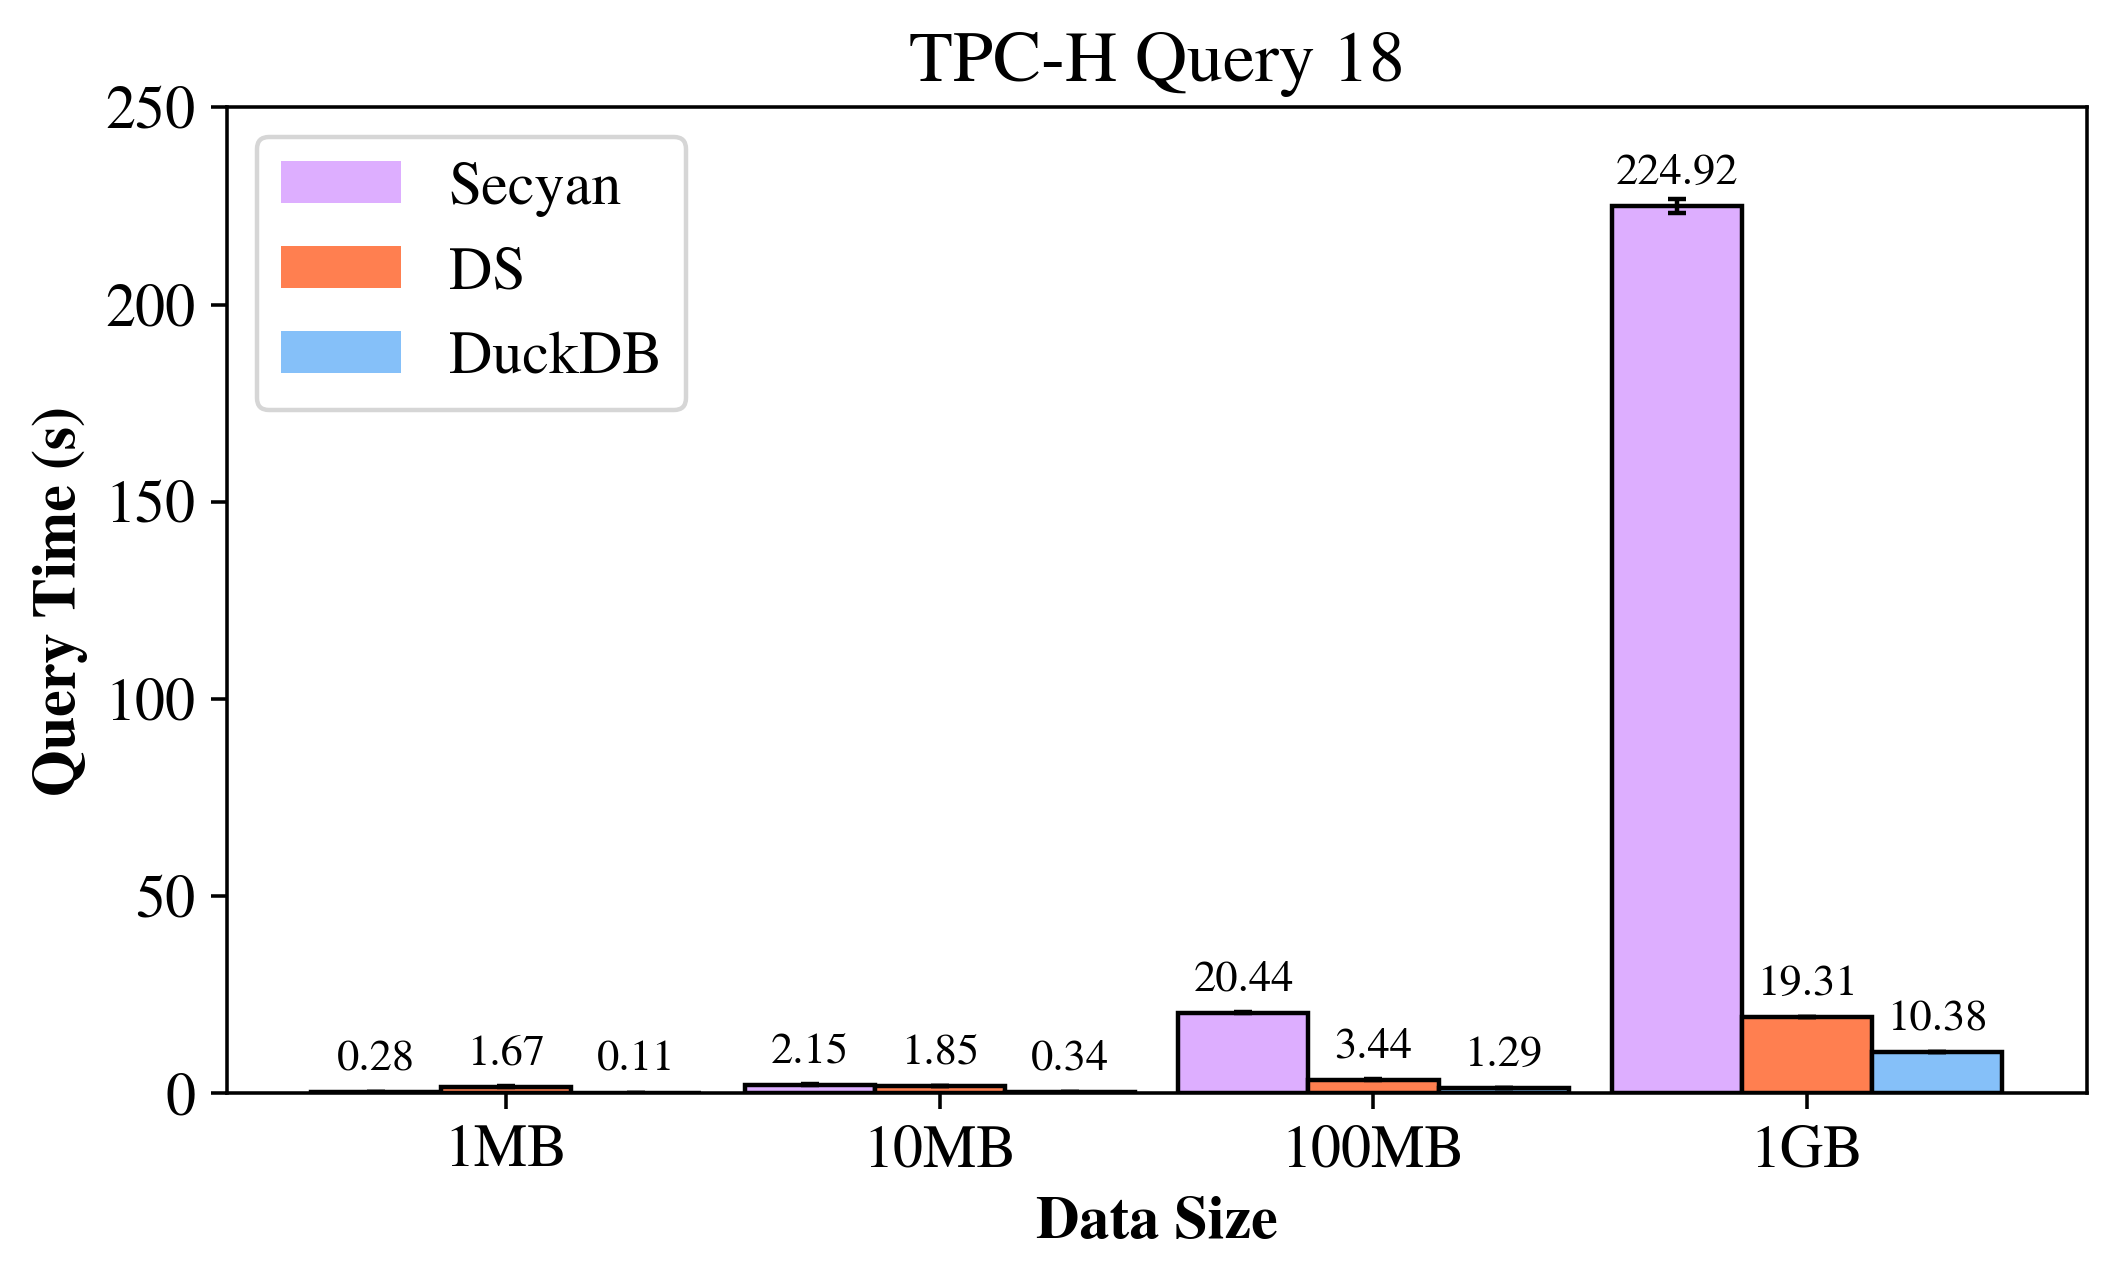

In [92]:
secyan_medians = secyan_data_dict[18]['secyan_medians']
secyan_stdevs = secyan_data_dict[18]['secyan_stdevs']
ds_medians = ds_data_dict[18]['ds_medians']
ds_stdevs = ds_data_dict[18]['ds_stdevs']
duckdb_medians = duckdb_data_dict[18]['baseline_medians']
duckdb_stdevs = duckdb_data_dict[18]['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(4) + 1

width = 0.3

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 250

plt.figure(figsize=(7.5, 4), dpi=320)
# plt.yscale('log')

# secyan
secyan_bar = plt.bar(x=X_axis-width,width=width,height=secyan_medians,label="Secyan",
        color='#ddaeff'
        )
plt.bar(x=X_axis-width,width=width,height=secyan_medians,yerr=secyan_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
left_x = [float("nan") if not np.isnan(row) else min_y for row in secyan_medians]
print(left_x)
plt.scatter(X_axis-width, left_x, [200]*4,
        #    edgecolors='black',
        #    facecolors = 'black',
           marker='x',
           color = "black",
           zorder=4,
           clip_on=False,
           linewidths=2.5,
            )

plt.scatter(X_axis-width,left_x, [165]*4,
        #     edgecolors='black',
        #     facecolors = 'black',
            marker='x',
            color = "#ddaeff",
            zorder=4,
            clip_on=False,
            linewidths=1,
            )
# print(conclave_medians[:2])
secyan_label = map(lambda n: '{0:.2f}'.format(n),secyan_medians)
plt.bar_label(secyan_bar, secyan_label, fontsize=bar_label_font_size,
        #       rotation=90, 
              padding=padding
              )


# ds
ds_bar = plt.bar(x=X_axis,width=width,height=ds_medians,label="DS",
        color='coral'
        )
plt.bar(x=X_axis,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
        #       rotation=90, 
                padding=padding
              )

# duckdb
duckdb_bar = plt.bar(x=X_axis+width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
plt.bar(x=X_axis+width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
        #       rotation=90,
              padding=padding
              )

axes = plt.gca()
axes.set_ylim([min_y,max_y])


plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.legend(ncol=1, loc='upper left')
plt.title("TPC-H Query 18")

plt.xticks(X_axis, ['1MB', '10MB', '100MB', '1GB'])

plt.savefig("tpch_q18.pdf", bbox_inches='tight')

plt.show()